In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import openpyxl
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("default of credit card clients.xls")

In [3]:
df.shape

(30001, 25)

In [4]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [5]:
df.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
              'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
              'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT']

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30001 non-null  object
 1   LIMIT_BAL  30001 non-null  object
 2   SEX        30001 non-null  object
 3   EDUCATION  30001 non-null  object
 4   MARRIAGE   30001 non-null  object
 5   AGE        30001 non-null  object
 6   PAY_0      30001 non-null  object
 7   PAY_2      30001 non-null  object
 8   PAY_3      30001 non-null  object
 9   PAY_4      30001 non-null  object
 10  PAY_5      30001 non-null  object
 11  PAY_6      30001 non-null  object
 12  BILL_AMT1  30001 non-null  object
 13  BILL_AMT2  30001 non-null  object
 14  BILL_AMT3  30001 non-null  object
 15  BILL_AMT4  30001 non-null  object
 16  BILL_AMT5  30001 non-null  object
 17  BILL_AMT6  30001 non-null  object
 18  PAY_AMT1   30001 non-null  object
 19  PAY_AMT2   30001 non-null  object
 20  PAY_AMT3   30001 non-null  o

In [8]:
df.dtypes

ID           object
LIMIT_BAL    object
SEX          object
EDUCATION    object
MARRIAGE     object
AGE          object
PAY_0        object
PAY_2        object
PAY_3        object
PAY_4        object
PAY_5        object
PAY_6        object
BILL_AMT1    object
BILL_AMT2    object
BILL_AMT3    object
BILL_AMT4    object
BILL_AMT5    object
BILL_AMT6    object
PAY_AMT1     object
PAY_AMT2     object
PAY_AMT3     object
PAY_AMT4     object
PAY_AMT5     object
PAY_AMT6     object
DEFAULT      object
dtype: object

In [9]:
updated_df = df.drop("ID",axis=1)
updated_df = updated_df.apply(pd.to_numeric,errors="coerce")

In [10]:
updated_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
updated_df["DEFAULT"].value_counts()

DEFAULT
0.0    23364
1.0     6636
Name: count, dtype: int64

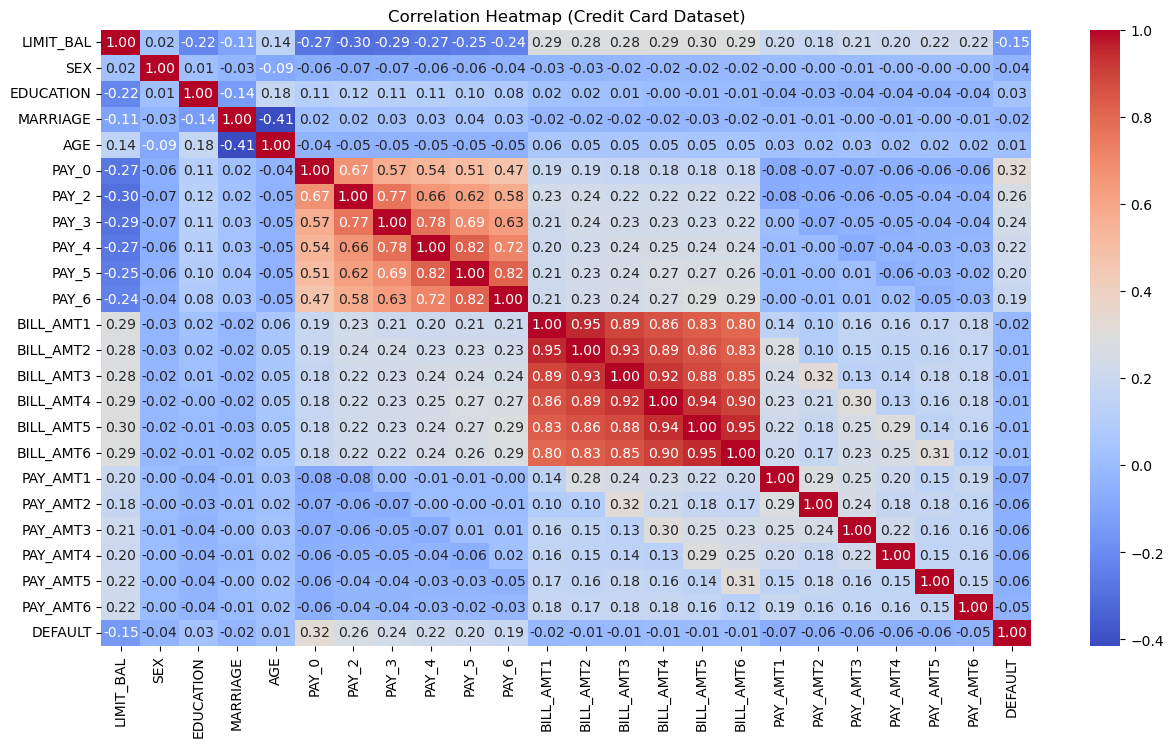

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(updated_df.corr() ,annot=True ,cmap="coolwarm" ,fmt=".2f")
plt.title("Correlation Heatmap (Credit Card Dataset)")
plt.show()

In [13]:
updated_df.isna().sum()

LIMIT_BAL    1
SEX          1
EDUCATION    1
MARRIAGE     1
AGE          1
PAY_0        1
PAY_2        1
PAY_3        1
PAY_4        1
PAY_5        1
PAY_6        1
BILL_AMT1    1
BILL_AMT2    1
BILL_AMT3    1
BILL_AMT4    1
BILL_AMT5    1
BILL_AMT6    1
PAY_AMT1     1
PAY_AMT2     1
PAY_AMT3     1
PAY_AMT4     1
PAY_AMT5     1
PAY_AMT6     1
DEFAULT      1
dtype: int64

In [14]:
updated_df.dropna()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000.0,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [20]:
x = updated_df.drop(['DEFAULT'], axis=1)
y = updated_df['DEFAULT']

imputer = SimpleImputer(strategy='mean')
y = pd.DataFrame(y)
imputer_y = SimpleImputer(strategy='most_frequent')
y_imputed = imputer_y.fit_transform(y)
y = pd.Series(y_imputed.flatten()) 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
model = LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [24]:
y_pred = model.predict(x_test_scaled)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      7006
         1.0       0.73      0.24      0.36      1995

    accuracy                           0.81      9001
   macro avg       0.77      0.61      0.63      9001
weighted avg       0.80      0.81      0.77      9001

[[6826  180]
 [1513  482]]


In [26]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train_scaled, y_train)

model = LogisticRegression(max_iter=1000)
model.fit(X_res, y_res)

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


LogisticRegression(max_iter=1000)

In [27]:
y_pred = model.predict(x_test_scaled)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.69      0.77      7006
         1.0       0.37      0.65      0.47      1995

    accuracy                           0.68      9001
   macro avg       0.62      0.67      0.62      9001
weighted avg       0.76      0.68      0.70      9001

[[4834 2172]
 [ 705 1290]]


In [29]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_res, y_res)

y_pred_proba = model.predict_proba(x_test_scaled)[:,1]
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

ROC-AUC: 0.722584079382012


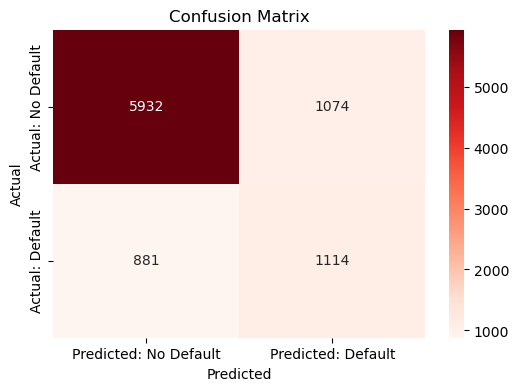

In [40]:
#heat map of confussion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Predicted: No Default','Predicted: Default'],
            yticklabels=['Actual: No Default','Actual: Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# decision tree implementation 

sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train_scaled, y_train)

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  
dt_model.fit(x_res, y_res)

y_pred = dt_model.predict(x_test_scaled)
y_pred_proba = dt_model.predict_proba(x_test_scaled)[:,1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.84      0.85      7006
         1.0       0.49      0.54      0.51      1995

    accuracy                           0.77      9001
   macro avg       0.68      0.69      0.68      9001
weighted avg       0.78      0.77      0.78      9001

Confusion Matrix:
 [[5873 1133]
 [ 911 1084]]
ROC-AUC Score: 0.7422337960230292


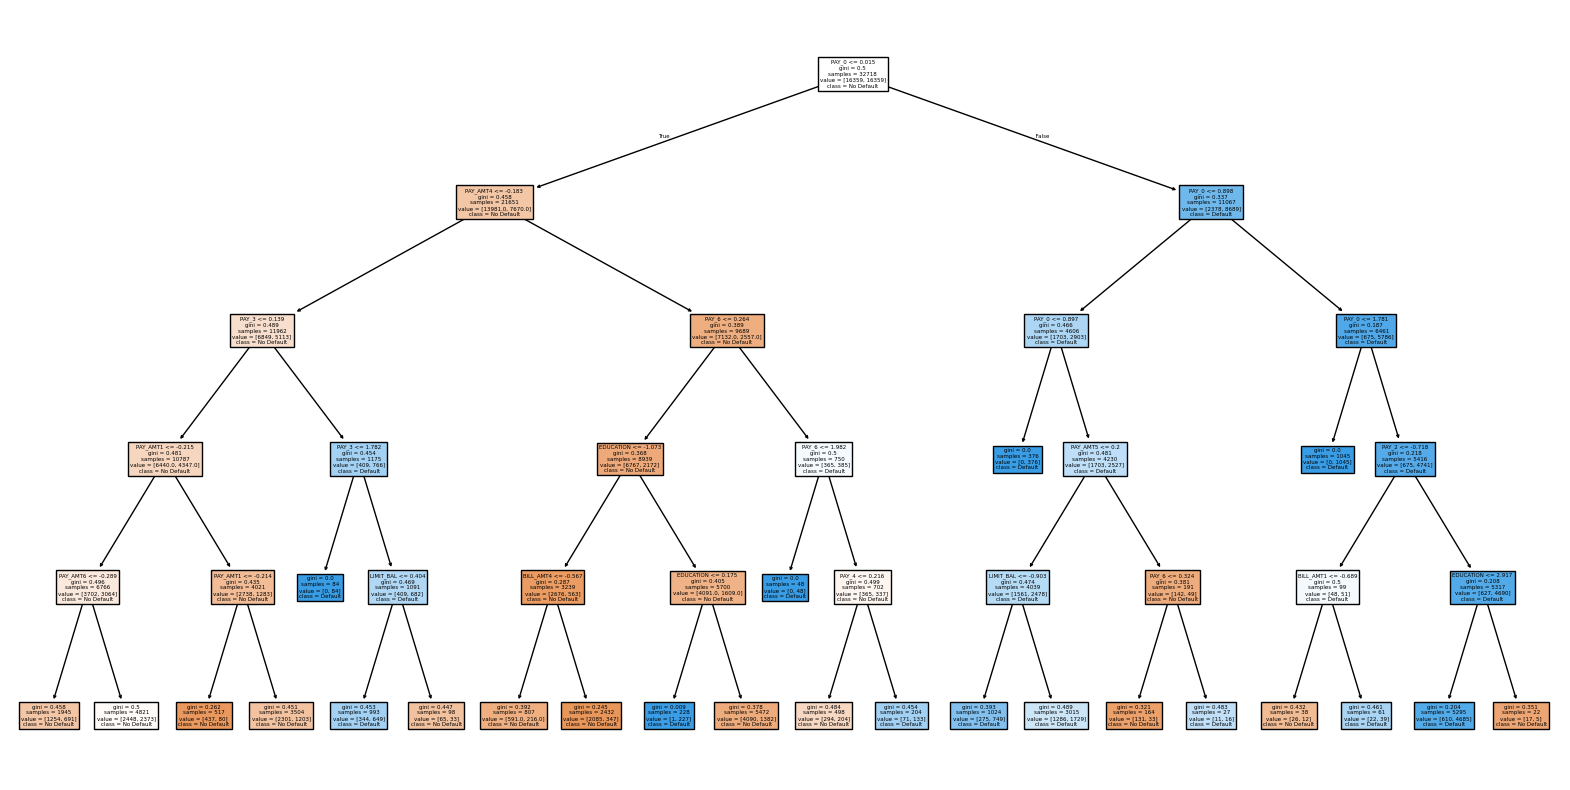

In [34]:
#visualize the decision tree

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=x.columns, class_names=['No Default', 'Default'], filled=True)
plt.show()

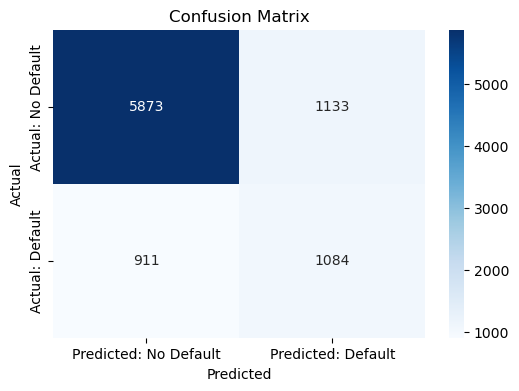

In [35]:
#heat maop of confussion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted: No Default','Predicted: Default'],
            yticklabels=['Actual: No Default','Actual: Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# implemetation of random forest classification 

rf_model = RandomForestClassifier(
    n_estimators=200,      
    max_depth=7,             
    random_state=42,
    class_weight='balanced'  
)
rf_model.fit(x_res, y_res)

y_pred = rf_model.predict(x_test_scaled)
y_pred_proba = rf_model.predict_proba(x_test_scaled)[:,1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      7006
         1.0       0.51      0.56      0.53      1995

    accuracy                           0.78      9001
   macro avg       0.69      0.70      0.70      9001
weighted avg       0.79      0.78      0.79      9001

Confusion Matrix:
 [[5932 1074]
 [ 881 1114]]
ROC-AUC Score: 0.7720200444016121


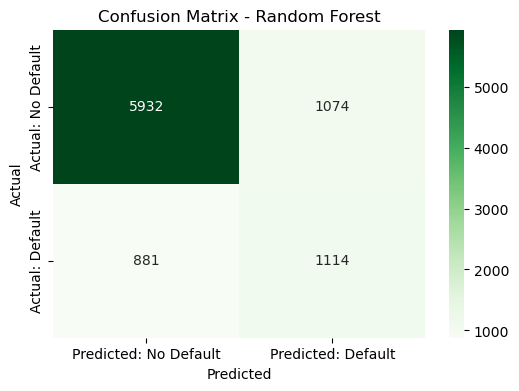

In [38]:
#heatmap of confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted: No Default','Predicted: Default'],
            yticklabels=['Actual: No Default','Actual: Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [43]:
# implementation of XGBoostClassifire

xgb_model = XGBClassifier(
    n_estimators=200,       # number of trees
    max_depth=5,            # tree depth
    learning_rate=0.1,      # step size shrinkage
    scale_pos_weight=(y_train==0).sum() / (y_train==1).sum(),  # handle imbalance
    use_label_encoder=False,
    eval_metric='logloss',  # avoid warning
    random_state=42
)

xgb_model.fit(X_res, y_res)

y_pred = xgb_model.predict(x_test_scaled)
y_pred_proba = xgb_model.predict_proba(x_test_scaled)[:,1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.60      0.72      7006
         1.0       0.35      0.74      0.48      1995

    accuracy                           0.64      9001
   macro avg       0.62      0.67      0.60      9001
weighted avg       0.77      0.64      0.67      9001

Confusion Matrix:
 [[4237 2769]
 [ 510 1485]]
ROC-AUC Score: 0.7612817728019735


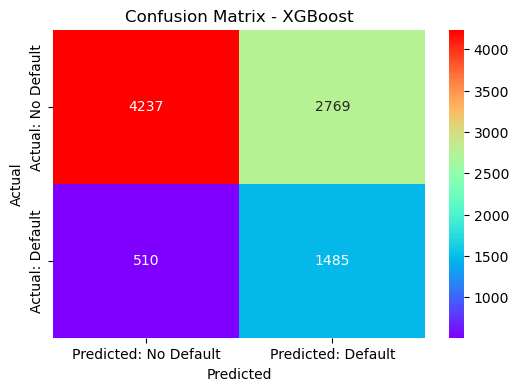

In [46]:
#heatmap of confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='rainbow', 
            xticklabels=['Predicted: No Default','Predicted: Default'],
            yticklabels=['Actual: No Default','Actual: Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()